# Ozone Layer Detection

The data collection process is done using https://archive.ics.uci.edu/ml/machine-learning-databases/ozone/

The Algorithms we will be using are

Support Vector Machine

K-Nearest Neighbour

Multilayer Perceptron Feed-Forward Network

## Data Collection and Imports

In [2]:
%pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9680 sha256=daf0190db2b6feddee01f9ad6bcf3825332e82df413899f8ff3273fe5122b16d
  Stored in directory: c:\users\prateek\appdata\local\pip\cache\wheels\bd\a8\c3\3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget
Note: you may need to restart the kernel to use updated packages.


In [7]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/ozone/eighthr.data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/ozone/eighthr.names
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/ozone/onehr.data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/ozone/onehr.names
!wget https://github.com/aaakashkumar/Ozone-Level-Detection/raw/master/eighthr.csv

--2022-04-08 01:05:57--  https://archive.ics.uci.edu/ml/machine-learning-databases/ozone/eighthr.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 818329 (799K) [application/x-httpd-php]
Saving to: 'eighthr.data.2'

     0K .......... .......... .......... .......... ..........  6% 36.7K 20s
    50K .......... .......... .......... .......... .......... 12% 78.4K 14s
   100K .......... .......... .......... .......... .......... 18% 25.0K 17s
   150K .......... .......... .......... .......... .......... 25% 29.4K 17s
   200K .......... .......... .......... .......... .......... 31% 25.4K 17s
   250K .......... .......... .......... .......... .......... 37% 31.7K 15s
   300K .......... .......... .......... .......... .......... 43% 25.2K 14s
   350K .......... .......... .......... .......... .......... 50% 18.7K 14

## Imports

In [1]:
import pandas as pd
import numpy as np

#### Data Clean up

In [2]:
df=pd.read_csv('eighthr.csv')
df_original=pd.read_csv('eighthr.csv')

#### Examine

In [3]:
print(df.shape)
df.head()

(2534, 74)


,Date,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR6,WSR7,WSR8,...,RH50,U50,V50,HT50,KI,TT,SLP,SLP_,Precp,Result
0,01-01-1998,0.8,1.8,2.4,2.1,2.0,2.1,1.5,1.7,1.9,...,0.15,10.67,-1.56,5795,-12.1,17.9,10330,-55,0.00,0
1,01-02-1998,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,...,0.48,8.39,3.84,5805,14.05,29,10275,-55,0.00,0
2,01-03-1998,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,...,0.6,6.94,9.8,5790,17.9,41.3,10235,-40,0.00,0
3,01-04-1998,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,...,0.49,8.73,10.54,5775,31.15,51.7,10195,-40,2.08,0
4,01-05-1998,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,...,?,?,?,?,?,?,?,?,0.58,0


we can observe that missing values are represented as "?"

In [4]:
df.describe()

,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR7,WSR8,WSR12,WSR17,...,T18,T19,T20,T21,T22,T23,T_PK,T_AV,Precp,Result
count,2235.000000,2242.000000,2240.000000,2242.000000,2241.000000,2242.000000,2245.000000,2244.000000,2247.000000,2251.000000,...,2350.000000,2346.000000,2345.000000,2349.000000,2342.000000,2345.000000,2359.000000,2359.000000,2532.000000,2534.000000
mean,1.640179,1.586351,1.545580,1.526405,1.522624,1.542417,2.047127,2.539037,3.044148,2.934562,...,22.509702,21.425661,20.615352,20.031588,19.502647,19.062260,25.578338,20.840483,0.372026,0.063141
std,1.271999,1.266558,1.239822,1.205520,1.198999,1.172189,1.160524,1.185366,1.418040,1.234769,...,7.086958,6.923495,6.865704,6.864111,6.900786,6.960842,7.151888,7.012967,1.317959,0.243265
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.200000,...,-0.200000,0.100000,0.200000,-0.300000,-1.400000,-1.200000,1.700000,0.300000,0.000000,0.000000
25%,0.600000,0.600000,0.600000,0.600000,0.600000,0.700000,1.200000,1.700000,2.000000,2.100000,...,17.825000,16.700000,15.800000,15.100000,14.600000,13.900000,21.200000,16.000000,0.000000,0.000000
50%,1.300000,1.300000,1.200000,1.300000,1.300000,1.300000,1.900000,2.500000,3.000000,2.900000,...,23.400000,22.500000,21.800000,21.300000,20.900000,20.700000,26.600000,22.200000,0.000000,0.000000
75%,2.400000,2.300000,2.200000,2.200000,2.200000,2.100000,2.800000,3.300000,4.000000,3.800000,...,28.100000,27.000000,26.300000,25.800000,25.400000,25.100000,31.100000,26.800000,0.050000,0.000000
max,7.500000,7.700000,7.100000,7.300000,7.200000,7.400000,7.500000,9.200000,9.000000,8.100000,...,37.800000,36.100000,34.600000,33.400000,32.600000,31.300000,41.600000,33.600000,20.650000,1.000000


Here we are describing the data with useful statistics 

In [5]:
df.drop(columns='Date',inplace=True)

In [6]:
df.head()

,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR6,WSR7,WSR8,WSR9,...,RH50,U50,V50,HT50,KI,TT,SLP,SLP_,Precp,Result
0,0.8,1.8,2.4,2.1,2.0,2.1,1.5,1.7,1.9,2.3,...,0.15,10.67,-1.56,5795,-12.1,17.9,10330,-55,0.00,0
1,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,3.4,...,0.48,8.39,3.84,5805,14.05,29,10275,-55,0.00,0
2,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,2.5,...,0.6,6.94,9.8,5790,17.9,41.3,10235,-40,0.00,0
3,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,3.1,...,0.49,8.73,10.54,5775,31.15,51.7,10195,-40,2.08,0
4,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,1.4,...,?,?,?,?,?,?,?,?,0.58,0


### Now we will replace missing values using imputer

In [7]:
df.replace(to_replace='?', value=np.nan,inplace=True)

In [8]:
df.head()

,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR6,WSR7,WSR8,WSR9,...,RH50,U50,V50,HT50,KI,TT,SLP,SLP_,Precp,Result
0,0.8,1.8,2.4,2.1,2.0,2.1,1.5,1.7,1.9,2.3,...,0.15,10.67,-1.56,5795,-12.1,17.9,10330,-55,0.00,0
1,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,3.4,...,0.48,8.39,3.84,5805,14.05,29,10275,-55,0.00,0
2,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,2.5,...,0.6,6.94,9.8,5790,17.9,41.3,10235,-40,0.00,0
3,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,3.1,...,0.49,8.73,10.54,5775,31.15,51.7,10195,-40,2.08,0
4,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,1.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.58,0


In [9]:
#We will split the data into feature(X) and target(Y)
X=df.iloc[:,:-1].values
Y=df.iloc[:,-1].values

In [10]:
from sklearn.impute import SimpleImputer
imputer =SimpleImputer(missing_values=np.nan, strategy='mean')

In [11]:
d=pd.DataFrame(imputer.fit_transform(df), dtype='float64')
df.columns=['WSR0','WSR1','WSR2','WSR3','WSR4','WSR5','WSR6','WSR7','WSR8','WSR9','WSR10','WSR11','WSR12','WSR13','WSR14','WSR15','WSR16','WSR17','WSR18','WSR19','WSR20','WSR21','WSR22','WSR23','WSR_PK','WSR_AV','T0','T1','T2','T3','T4','T5','T6','T7','T8','T9','T10','T11','T12','T13','T14','T15','T16','T17','T18','T19','T20','T21','T22','T23','T_PK','T_AV','T85','RH85','U85','V85','HT85','T70','RH70','U70','V70','HT70','T50','RH50','U50','V50','HT50','KI','TT','SLP','SLP_','Precp','Result']
df.head()

,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR6,WSR7,WSR8,WSR9,...,RH50,U50,V50,HT50,KI,TT,SLP,SLP_,Precp,Result
0,0.8,1.8,2.4,2.1,2.0,2.1,1.5,1.7,1.9,2.3,...,0.15,10.67,-1.56,5795,-12.1,17.9,10330,-55,0.00,0
1,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,3.4,...,0.48,8.39,3.84,5805,14.05,29,10275,-55,0.00,0
2,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,2.5,...,0.6,6.94,9.8,5790,17.9,41.3,10235,-40,0.00,0
3,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,3.1,...,0.49,8.73,10.54,5775,31.15,51.7,10195,-40,2.08,0
4,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,1.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.58,0


In [12]:
#now lets check if missing values are still there
if np.nan in df['T_PK'].values.tolist():
    print("NaN values are there")
else:
    print("No NaN values are there")

No NaN values are there


In [13]:
#Clean the data using Imputer Class
X=imputer.fit_transform(X)

In [14]:
#Now split the data into two parts train and test.
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=9)

## Data Visualization

In [15]:
#now we will be visualizing the data using matplotlib and seaborn.
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import seaborn as sns

%matplotlib inline

Temprature Plots 

<AxesSubplot:xlabel='Temperature', ylabel='Frequency'>

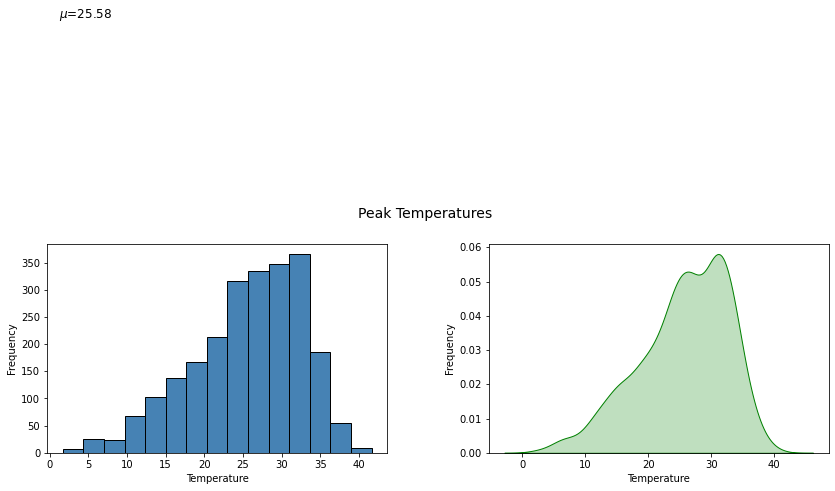

In [21]:
fig=plt.figure(figsize=(14,4))
title = fig.suptitle("Peak Temperatures",fontsize=14)
fig.subplots_adjust(top=0.85,wspace=0.3)

#histogram
ax=fig.add_subplot(1,2, 1)
ax.set_xlabel("Temperature")
ax.set_ylabel("Frequency")
ax.text(1.2,800,r'$\mu$='+str(round(df['T_PK'].mean(),2)),fontsize=12)
freq, bins, patches=ax.hist(df['T_PK'],color='steelblue',bins=15,edgecolor='black',linewidth=1)

#density plot
ax1=fig.add_subplot(1,2,2)
ax1.set_xlabel("Temperature")
ax1.set_ylabel("Frequency")
sns.kdeplot(df['T_PK'],ax=ax1,shade=True,color='green')